In [64]:
import numpy as np
from matplotlib import pyplot as plt

def todB(num):
    return 10*np.log10(num)
def toLinear(num):
    return 10**(num/10)

In [30]:
#-----------DATA
c_freq = 5e9
bandwidth = 40e6
wavelength = 3e8 / c_freq
tx_power = 10e-3
antenna_gain = 10**0.3

#noise
kBT = 1.38e-23 * bandwidth * 290

In [117]:
#-------------NEED AT LEAST QPSK? Hartleys law
#8dB min SNR
2 * 40 * np.log2(4)

160.0

In [105]:
#---------LOSS THROUGH WALLS p.187
concreteLoss = 24.1
drywallLoss = 0.3 #two sheets of drywall per wall
def propagationLossExp(r, k = 2.7):
    return (4 * np.pi/wavelength)** 2 * r**k

def ITU_indoor_propagation(r, n=31, floors = 0):
    return toLinear(20 * np.log10(c_freq/1e6) + n * np.log10(r) - 28 + (16 * floors)) #NO FLOORS (+16 per floor)
     

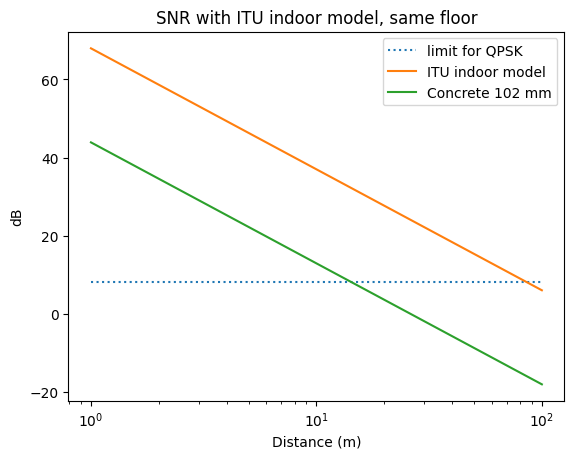

In [118]:
#-------------PLOT RECEIVED POWER
received_power_list = []
received_power_list_drywall = []
received_power_list_concrete = []

distance = 100

for i in range(1, distance + 1):
    received_power_list.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i) * kBT)))
    received_power_list_drywall.append(received_power_list[i-1] - drywallLoss * 2)
    received_power_list_concrete.append(received_power_list[i-1] - concreteLoss)

plt.xscale('log')  
plt.title('SNR with ITU indoor model, same floor')
plt.ylabel('dB')
plt.xlabel('Distance (m)')
#limits 
#
#https://community.cisco.com/legacyfs/online/attachments/discussion/revolution-wi-fi-mcs-to-snr-single-page.pdf
#QAM256 = 27.5
#QAM64 = 20
QPSK = 8
QAM16 = 24
#plt.plot(range(1, 61), [QAM256 for x in range(0,60)], label='QAM256', linestyle='dotted')
plt.plot(range(1, distance + 1), [QPSK for x in range(0,distance)], label='limit for QPSK', linestyle='dotted')

#signals
plt.plot(range(1, distance + 1), received_power_list, label='ITU indoor model')
#plt.plot(range(1, distance + 2), received_power_list_drywall, label='Drywall')
plt.plot(range(1, distance + 1), received_power_list_concrete, label='Concrete 102 mm')
plt.legend()

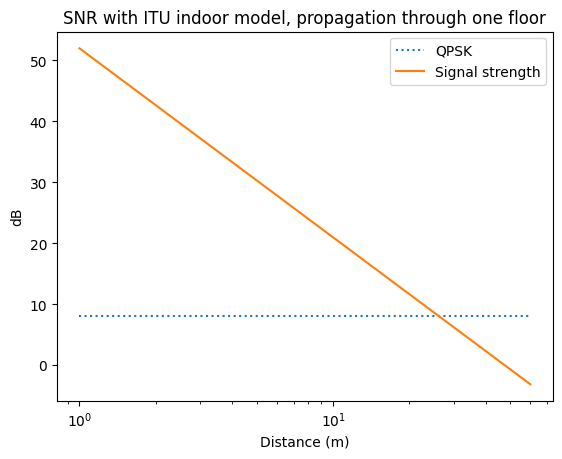

In [107]:
#From floor to floor
received_power_list_second_floor = []
for i in range(1, 61):
    received_power_list_second_floor.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i, 31, 1) * kBT)))
    
    
plt.plot(range(1, 61), [QPSK for x in range(0,60)], label='QPSK', linestyle='dotted')

plt.xscale('log')  
plt.title('SNR with ITU indoor model, propagation through one floor')
plt.ylabel('dB')
plt.xlabel('Distance (m)')
#signals
plt.plot(range(1, 61), received_power_list_second_floor, label='Signal strength')
plt.legend()